In [1]:
import numpy as np
from ler import LeR
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
ler = LeR(min_lensed_images=2, max_lensed_images=4)

Given: IMR waveform
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
getting stored interpolator...
In case if you need regeneration of interpolator of the given gwsnr param, please delete this file, ./interpolator_pickle/halfSNR_dict_5.pickle


In [6]:
ler.batch_size = 10000
ler.selecting_n_lensed_detectable_events(nsamples=200, resume=False);

collected number of events =  0


100%|███████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1438.93it/s]


collected number of events =  88


100%|███████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1393.37it/s]


collected number of events =  200
trmming final result to size=200


In [10]:
ler.selecting_n_unlensed_detectable_events(nsamples=500);

collected number of events =  0
collected number of events =  66
collected number of events =  137
collected number of events =  186
collected number of events =  243
collected number of events =  288
collected number of events =  357
collected number of events =  431
collected number of events =  496
collected number of events =  571
trmming final result to size=500


In [11]:
json_file = './lensed_params_detectable.json'
with open(json_file, "r", encoding='utf-8') as f:
    lensed_param = json.load(f)
    
json_file = './gw_params_detectable.json'
with open(json_file, "r", encoding='utf-8') as f:
    unlensed_param = json.load(f)

In [16]:
mu_rel0, dt_rel0, mu_rel90, dt_rel90 = \
    ler.relative_mu_dt_lensed(lensed_param=lensed_param, snr_threshold=[8.,8.])

dmu, dt = ler.relative_mu_dt_unlensed(param=unlensed_param, size=200)

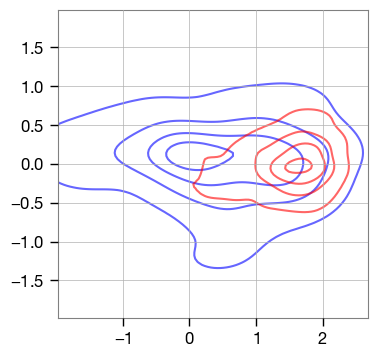

In [17]:
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
plt.show()